<style  type="text/css"> 
</style>

<b><center>
<span style="font-size: 24pt; line-height: 1.2">
COMS W4111: Introduction to Databases<br>Fall 2023, Section 2
</span>
</center></b>
</span><br>
<p>
<i><center>
<span style="font-size: 20pt; line-height: 1.2">
Homework 1, Part 2: Programming
</span>
</center></i>

# Introduction

This notebook contains HW1 Part 2 Programming. **Only those on the programming track should complete this part.** To ensure everything runs as expected, work on this notebook in Jupyter.

Submission instructions:

- You will submit **PDF and ZIP files** for this assignment. Gradescope will have two separate assignments for these.
- For the PDF:
    - The most reliable way to save as PDF is to go to your browser's menu bar and click `File -> Print`. **Switch the orientation to landscape mode**, and hit save.
    - **MAKE SURE ALL YOUR WORK (CODE AND SCREENSHOTS) IS VISIBLE ON THE PDF. YOU WILL NOT GET CREDIT IF ANYTHING IS CUT OFF.** Reach out for troubleshooting.
- For the ZIP:
    - Zip the folder that contains this notebook, any screenshots, and the code you write.
    - To avoid freezing Gradescope with too many files, when you finish this assignment, delete any unnecessary directories. Such directories include `venv`, `.idea`, and `.git`.

<hr style="height:2px;">

# Add Student Information

In [1]:
# Print your name, uni, and track below

name = "Edison Chen"
uni = "zc2738"
track = "Programming"

print(name)
print(uni)
print(track)

Edison Chen
zc2738
Programming


<hr style="height:2px;">

# Setup

## Python Libraries

In [2]:
import json

from IPython.display import Image
import requests

## Python Environment

There's a bit of work to do to get your Python environment set up.

1. Open the `src/` folder in PyCharm.
2. Follow [these instructions](https://www.jetbrains.com/help/pycharm/creating-virtual-environment.html#python_create_virtual_env) to set up a virtual environment. This'll give us an blank, isolated environment for packages that we install. It's fine to use the `Virtualenv Environment` tab.
3. Open the Terminal in PyCharm. Make sure your virtual environment is active (you'll probably see `(venv)` somewhere).
4. Run `pip install -r requirements.txt`. `requirements.txt` contains all the packages that the project needs, such as `pymysql`.
5. Run `pip install -e .` (including the period). This installs the `db/`, `models/`, and `resources/` directories as packages so we can easily import them. You'll see a new folder created called `local.egg-info`. You can ignore it.

<hr style="height:2px;">

# Load Data

We're going to use data from the `db_book` database you created in HW0. Since you'll be inserting and deleting data in this assignment, let's create a copy that you can freely modify.

In the HW folder, you'll find `hw1-book-DDL.sql` and `hw1-book-smallRelationsInsertFile.sql`. Run these files. They'll create a new schema called `db_book_hw1` that looks exactly like `db_book`.

We'll only be using the `student` relation.

<hr style="height:2px;">

# Student API

For this assignment, you'll create an API that allows users to [read, create, update, and delete](https://en.wikipedia.org/wiki/Create,_read,_update_and_delete) students. Your API serves as the layer between clients and the database. By the end, you should be able to interact with the database by calling your API's endpoints.

The `src/` directory has the following structure:

```
src
|
|- db
|
|- models
|
|- resources
```

We'll go through each directory below.

## Models

In `models/`, you'll find a file called `models.py`. This file contains class definitions for `Student`. This represents the `student` in `db_book_hw1`. When you query data from your database, the data should fit in this class.

Why do we need a model? Models allow us to represent SQL data structures as Python classes. We can then treat them like any normal class. Models also allow us to do data validation, such as type checking.

Notice how `dept_name` and `tot_cred` are of type `Optional` (meaning they can be `None`), while `ID` and `name` are not. **Based on the DDL of `student`, why is this?**

<i> ID is the primary key of this table so it cannot be null, and name is set to be "varchar(20) not null" in the DDL. The other two variables don't have these constraints. </i>

## DB

The `db/` directory contains a file named `db.py`. This file defines a `DB` class, which is responsible for creating the database connection and running queries against it.

The `execute_query` method takes in a `query` string and `args` list. You may wonder why we need `args`. The reason is that `query` can contain `%s` placeholders (think format strings in C). For instance, `query` may look like

```
SELECT * FROM student WHERE name = %s AND tot_cred = %s
```

In this case, `args` should be a list of length 2 (for the 2 placeholders). When the query is executed, the placeholders are replaced.

Why do we need placeholders in the first place? One reason is to avoid having to worry about extra quotation marks. For instance, if `args` is `["Joe", 10]`, then the executed query would look like

```
SELECT * FROM student WHERE name = "Joe" AND tot_cred = 10
```

Note that `Joe` is wrapped in quotes (since it's a string) while `10` is not (since it's a number). You could definitely do type checking in Python and add quotes yourself, but why do extra work?

**Your task is to implement 8 methods: `build_select_query`, `select`, `build_insert_query`, `insert`, `build_update_query`, `update`, `build_delete_query`, and `delete`.**

## DB Testing

To test your `build_*` methods, run the `db_test.py` file. This file defines some unit tests. **Post a screenshot of your successful tests below.**

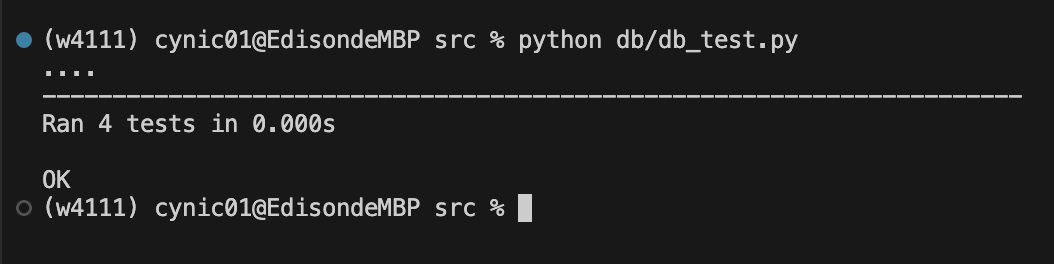

In [3]:
Image("./db_test_pass.png")

## Resources

In `resources/`, you should find `studentresource.py`. This file contains student-specific logic for interacting with the database.

**Your task is to implement 4 methods: `get_by_id`, `create`, `update`, and `delete`.** The `get_all` method has been completed for your reference. **You should not be constructing your own queries in the methods**; instead, call the database methods you defined in `db.py`.

## main

The top level directory contains a `main.py` file. This file declares our API and defines paths for it. The `@app` decorator above each method describes the HTTP method and the path associated with that method.

**Your task is to implement 4 methods: `get_student`, `post_student`, `put_student`, and `delete_student`. The `get_students` method has been completed for your reference.** Since we don't have much extra business logic, your methods should not be that long.

<hr style="height:2px;">

# Testing Your API

With your API running, execute the following cell.

In [4]:
BASE_URL = "http://localhost:8002/"

def print_json(j):
    print(json.dumps(j, indent=2))

In [5]:
# Healthcheck

r = requests.get(BASE_URL)
j = r.json()
print_json(j)

"I'm alive!"


In [6]:
# Get all students

r = requests.get(BASE_URL + "students")
j = r.json()
n = len(j)
print_json(j)

[
  {
    "ID": 128,
    "name": "Zhang",
    "dept_name": "Comp. Sci.",
    "tot_cred": 102
  },
  {
    "ID": 12345,
    "name": "Shankar",
    "dept_name": "Comp. Sci.",
    "tot_cred": 32
  },
  {
    "ID": 19991,
    "name": "Brandt",
    "dept_name": "History",
    "tot_cred": 80
  },
  {
    "ID": 23121,
    "name": "Chavez",
    "dept_name": "Finance",
    "tot_cred": 110
  },
  {
    "ID": 44553,
    "name": "Peltier",
    "dept_name": "Physics",
    "tot_cred": 56
  },
  {
    "ID": 45678,
    "name": "Levy",
    "dept_name": "Physics",
    "tot_cred": 46
  },
  {
    "ID": 54321,
    "name": "Williams",
    "dept_name": "Comp. Sci.",
    "tot_cred": 54
  },
  {
    "ID": 55739,
    "name": "Sanchez",
    "dept_name": "Music",
    "tot_cred": 38
  },
  {
    "ID": 70557,
    "name": "Snow",
    "dept_name": "Physics",
    "tot_cred": 0
  },
  {
    "ID": 76543,
    "name": "Brown",
    "dept_name": "Comp. Sci.",
    "tot_cred": 58
  },
  {
    "ID": 76653,
    "name": "Aoi",


In [7]:
# Create a new student

or_student = {
    "ID": 100,
    "name": "Olivia",
    "dept_name": "Music",
    "tot_cred": 100,
}
r = requests.post(BASE_URL + "students", json=or_student)
j = r.json()
print_json(j)

assert j == 1

1


In [8]:
# Get that new student

r = requests.get(BASE_URL + "students/100")

j = r.json()
print_json(j)

assert j == or_student

{
  "ID": 100,
  "name": "Olivia",
  "dept_name": "Music",
  "tot_cred": 100
}


In [9]:
r = requests.get(BASE_URL + "students?tot_cred=100")
print_json(r.json())

[
  {
    "ID": 100,
    "name": "Olivia",
    "dept_name": "Music",
    "tot_cred": 100
  }
]


In [10]:
# Update the student

r = requests.put(BASE_URL + "students/100", json={"tot_cred": 105})
j = r.json()
print_json(j)

assert j == 1
or_student["tot_cred"] = 105

1


In [11]:
# Get that student

r = requests.get(BASE_URL + "students/100")
j = r.json()
print_json(j)

assert j == or_student

{
  "ID": 100,
  "name": "Olivia",
  "dept_name": "Music",
  "tot_cred": 105
}


In [12]:
r = requests.get(BASE_URL + "students?tot_cred=105")
print_json(r.json())

[
  {
    "ID": 100,
    "name": "Olivia",
    "dept_name": "Music",
    "tot_cred": 105
  }
]


In [13]:
# Delete the student

r = requests.delete(BASE_URL + "students/100")
j = r.json()
print_json(j)

assert j == 1

1


In [14]:
# This should return null

r = requests.get(BASE_URL + "students/100")
j = r.json()
print_json(j)

assert j is None

null


In [15]:
# Get all students

r = requests.get(BASE_URL + "students")
j = r.json()
print_json(j)

assert len(j) == n

[
  {
    "ID": 128,
    "name": "Zhang",
    "dept_name": "Comp. Sci.",
    "tot_cred": 102
  },
  {
    "ID": 12345,
    "name": "Shankar",
    "dept_name": "Comp. Sci.",
    "tot_cred": 32
  },
  {
    "ID": 19991,
    "name": "Brandt",
    "dept_name": "History",
    "tot_cred": 80
  },
  {
    "ID": 23121,
    "name": "Chavez",
    "dept_name": "Finance",
    "tot_cred": 110
  },
  {
    "ID": 44553,
    "name": "Peltier",
    "dept_name": "Physics",
    "tot_cred": 56
  },
  {
    "ID": 45678,
    "name": "Levy",
    "dept_name": "Physics",
    "tot_cred": 46
  },
  {
    "ID": 54321,
    "name": "Williams",
    "dept_name": "Comp. Sci.",
    "tot_cred": 54
  },
  {
    "ID": 55739,
    "name": "Sanchez",
    "dept_name": "Music",
    "tot_cred": 38
  },
  {
    "ID": 70557,
    "name": "Snow",
    "dept_name": "Physics",
    "tot_cred": 0
  },
  {
    "ID": 76543,
    "name": "Brown",
    "dept_name": "Comp. Sci.",
    "tot_cred": 58
  },
  {
    "ID": 76653,
    "name": "Aoi",
